In [14]:
# Célula 1: Preparação e Pré-processamento dos Dados (VERSÃO CORRIGIDA)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregue seu dataset
caminho_do_arquivo = "../dataset/heart_attack_prediction_dataset.csv" 
df = pd.read_csv(caminho_do_arquivo)

print("--- Dados Originais Carregados ---")
display(df.head())

# ==================== INÍCIO DO PRÉ-PROCESSAMENTO ====================

# PASSO 1: Remover colunas de identificação que não são features
# axis=1 significa que estamos removendo uma coluna
# No topo do seu notebook de ML, logo após carregar o 'df'

print("Aplicando pré-processamento para alinhar com o main.py...")

# Processa a coluna de Pressão Arterial, se existir e for texto
if 'Blood Pressure' in df.columns and df['Blood Pressure'].dtype == 'object':
    print("Transformando a coluna 'Blood Pressure'...")
    split_bp = df['Blood Pressure'].str.split('/', expand=True)
    df['Pressao_Sistolica'] = pd.to_numeric(split_bp[0], errors='coerce')
    df['Pressao_Diastolica'] = pd.to_numeric(split_bp[1], errors='coerce')

    # Preenche possíveis NaNs criados na conversão com a mediana da coluna
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Remove a coluna original
    df = df.drop(columns=['Blood Pressure'])
    print("✅ Coluna 'Blood Pressure' processada.")

# Remove o ID do paciente, se existir
if 'Patient ID' in df.columns:
    df = df.drop('Patient ID', axis=1)
    print("✅ Coluna 'Patient ID' removida.")


# PASSO 2: Separar Features (X) e Alvo (y) ANTES do encoding
nome_coluna_alvo = 'Heart Attack Risk'
X = df.drop(nome_coluna_alvo, axis=1)
y = df[nome_coluna_alvo]

# PASSO 3: Converter todas as colunas de texto em colunas numéricas (One-Hot Encoding)
# O pandas identifica automaticamente as colunas com texto e as converte
print("\nAplicando One-Hot Encoding nas colunas categóricas...")
X_encoded = pd.get_dummies(X, drop_first=True) 
# drop_first=True é uma boa prática para remover redundância (ex: se não for Male, é Female)

from sklearn.preprocessing import StandardScaler

# Cria uma instância do scaler
scaler = StandardScaler()

# ATENÇÃO: É crucial treinar o scaler APENAS com os dados de treino para evitar vazamento de dados do teste.
# Por isso, fazemos a divisão ANTES de escalar.

# Dividir em Treino e Teste (usando o X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Treina o scaler nos dados de treino E transforma os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Apenas TRANSFORMA os dados de teste usando o scaler JÁ TREINADO
X_test_scaled = scaler.transform(X_test)

print("✅ Dados escalados com sucesso!")

print("Novas dimensões do X após encoding:", X_encoded.shape)
print("Visualização do X transformado:")
display(X_encoded.head())

# ==================== FIM DO PRÉ-PROCESSAMENTO ====================


# PASSO 4: Dividir em Treino e Teste (usando o X_encoded)
print("\nDividindo os dados em conjuntos de treino e teste...")
# Agora usamos o X_encoded, que é puramente numérico
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"\Tamanho dos dados de treino: {X_train.shape[0]} amostras")
print(f"Tamanho dos dados de teste: {X_test.shape[0]} amostras")
print("\n✅ Preparação de dados concluída! Agora o modelo pode ser treinado.")

<>:84: SyntaxWarning: invalid escape sequence '\T'
<>:84: SyntaxWarning: invalid escape sequence '\T'
C:\Users\yutam\AppData\Local\Temp\ipykernel_1996\3194508170.py:84: SyntaxWarning: invalid escape sequence '\T'
  print(f"\Tamanho dos dados de treino: {X_train.shape[0]} amostras")


--- Dados Originais Carregados ---


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Aplicando pré-processamento para alinhar com o main.py...
Transformando a coluna 'Blood Pressure'...
✅ Coluna 'Blood Pressure' processada.
✅ Coluna 'Patient ID' removida.

Aplicando One-Hot Encoding nas colunas categóricas...
✅ Dados escalados com sucesso!
Novas dimensões do X após encoding: (8763, 48)
Visualização do X transformado:


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Southern Hemisphere
0,67,208,72,0,0,1,0,0,4.168189,0,...,False,False,False,False,False,False,False,False,True,True
1,21,389,98,1,1,1,1,1,1.813242,1,...,False,False,False,False,False,False,False,True,False,False
2,21,324,72,1,0,0,0,0,2.078353,1,...,False,False,False,False,False,False,True,False,False,False
3,84,383,73,1,1,1,0,1,9.828130,1,...,False,False,False,False,False,False,False,True,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,...,True,False,False,False,True,False,False,False,False,False



Dividindo os dados em conjuntos de treino e teste...
\Tamanho dos dados de treino: 7010 amostras
Tamanho dos dados de teste: 1753 amostras

✅ Preparação de dados concluída! Agora o modelo pode ser treinado.


In [15]:
# Célula 2: Treinamento do Modelo

from sklearn.tree import DecisionTreeClassifier

# 1. Cria uma instância do modelo
# max_depth=5 limita a profundidade da árvore para evitar que ela decore os dados (overfitting)
modelo_arvore = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Treina o modelo usando os dados de TREINO
print("Treinando o modelo de Árvore de Decisão...")
modelo_arvore.fit(X_train, y_train)

print("✅ Modelo treinado com sucesso!")

Treinando o modelo de Árvore de Decisão...
✅ Modelo treinado com sucesso!


In [16]:
# Célula 3: Avaliação do Modelo

# 1. Usa o modelo treinado para fazer previsões nos dados de TESTE
print("Fazendo previsões nos dados de teste...")
y_previsoes = modelo_arvore.predict(X_test)

# 2. Compara as previsões com os resultados reais (y_test)
acuracia = accuracy_score(y_test, y_previsoes)
print(f"\nAcurácia do modelo: {acuracia:.2%}")
print("Acurácia significa a porcentagem de vezes que o modelo acertou a previsão.")

# 3. Análise mais profunda com a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
# Mostra onde o modelo acertou e errou de forma detalhada
cm = confusion_matrix(y_test, y_previsoes)
print(cm)
print("\nInterpretação da Matriz:")
print(f"Verdadeiros Negativos (previu 'não' e era 'não'): {cm[0][0]}")
print(f"Falsos Positivos (previu 'sim' e era 'não'): {cm[0][1]}")
print(f"Falsos Negativos (previu 'não' e era 'sim'): {cm[1][0]}  <-- Erro potencialmente perigoso!")
print(f"Verdadeiros Positivos (previu 'sim' e era 'sim'): {cm[1][1]}")

# 4. Relatório completo de classificação
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_previsoes))

Fazendo previsões nos dados de teste...

Acurácia do modelo: 63.95%
Acurácia significa a porcentagem de vezes que o modelo acertou a previsão.

--- Matriz de Confusão ---
[[1117    8]
 [ 624    4]]

Interpretação da Matriz:
Verdadeiros Negativos (previu 'não' e era 'não'): 1117
Falsos Positivos (previu 'sim' e era 'não'): 8
Falsos Negativos (previu 'não' e era 'sim'): 624  <-- Erro potencialmente perigoso!
Verdadeiros Positivos (previu 'sim' e era 'sim'): 4

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.33      0.01      0.01       628

    accuracy                           0.64      1753
   macro avg       0.49      0.50      0.40      1753
weighted avg       0.53      0.64      0.50      1753



In [17]:
# Célula 2: Treinamento do Modelo

from sklearn.tree import DecisionTreeClassifier

# 1. Cria uma instância do modelo
# max_depth=5 limita a profundidade da árvore para evitar que ela decore os dados (overfitting)
modelo_arvore = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')

# 2. Treina o modelo usando os dados de TREINO
print("Treinando o modelo de Árvore de Decisão...")
modelo_arvore.fit(X_train, y_train)

print("✅ Modelo treinado com sucesso!")

Treinando o modelo de Árvore de Decisão...
✅ Modelo treinado com sucesso!


In [18]:
# Célula 3: Avaliação do Modelo

# 1. Usa o modelo treinado para fazer previsões nos dados de TESTE
print("Fazendo previsões nos dados de teste...")
y_previsoes = modelo_arvore.predict(X_test)

# 2. Compara as previsões com os resultados reais (y_test)
acuracia = accuracy_score(y_test, y_previsoes)
print(f"\nAcurácia do modelo: {acuracia:.2%}")
print("Acurácia significa a porcentagem de vezes que o modelo acertou a previsão.")

# 3. Análise mais profunda com a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
# Mostra onde o modelo acertou e errou de forma detalhada
cm = confusion_matrix(y_test, y_previsoes)
print(cm)
print("\nInterpretação da Matriz:")
print(f"Verdadeiros Negativos (previu 'não' e era 'não'): {cm[0][0]}")
print(f"Falsos Positivos (previu 'sim' e era 'não'): {cm[0][1]}")
print(f"Falsos Negativos (previu 'não' e era 'sim'): {cm[1][0]}  <-- Erro potencialmente perigoso!")
print(f"Verdadeiros Positivos (previu 'sim' e era 'sim'): {cm[1][1]}")

# 4. Relatório completo de classificação
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_previsoes))

Fazendo previsões nos dados de teste...

Acurácia do modelo: 53.05%
Acurácia significa a porcentagem de vezes que o modelo acertou a previsão.

--- Matriz de Confusão ---
[[658 467]
 [356 272]]

Interpretação da Matriz:
Verdadeiros Negativos (previu 'não' e era 'não'): 658
Falsos Positivos (previu 'sim' e era 'não'): 467
Falsos Negativos (previu 'não' e era 'sim'): 356  <-- Erro potencialmente perigoso!
Verdadeiros Positivos (previu 'sim' e era 'sim'): 272

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.65      0.58      0.62      1125
           1       0.37      0.43      0.40       628

    accuracy                           0.53      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.53      0.54      1753



In [19]:
# Célula 2 (VERSÃO COM RANDOM FOREST)

from sklearn.ensemble import RandomForestClassifier

# 1. Cria uma instância do modelo Random Forest
# n_estimators=100 significa que ele vai construir 100 árvores
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')

# 2. Treina o modelo
print("Treinando o modelo Random Forest...")
modelo_rf.fit(X_train, y_train)

print("✅ Modelo treinado com sucesso!")

Treinando o modelo Random Forest...
✅ Modelo treinado com sucesso!


In [27]:
# Célula 3: Avaliação do Modelo Random Forest

# Garante que as bibliotecas de métricas foram importadas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Avaliando o modelo RandomForestClassifier ---")

# 1. Usa o modelo RANDOM FOREST treinado para fazer previsões nos dados de TESTE
# A única mudança é usar 'modelo_rf' em vez de 'modelo_arvore'
print("Fazendo previsões nos dados de teste...")
y_previsoes = modelo_rf.predict(X_test) # <-- MUDANÇA AQUI

# 2. Compara as previsões com os resultados reais (y_test)
acuracia = accuracy_score(y_test, y_previsoes)
print(f"\nAcurácia do modelo: {acuracia:.2%}")
print("Acurácia significa a porcentagem de vezes que o modelo acertou a previsão.")

# 3. Análise mais profunda com a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
# Mostra onde o modelo acertou e errou de forma detalhada
cm = confusion_matrix(y_test, y_previsoes)
print(cm)
print("\nInterpretação da Matriz:")
print(f"Verdadeiros Negativos (previu 'não' e era 'não'): {cm[0][0]}")
print(f"Falsos Positivos (previu 'sim' e era 'não'): {cm[0][1]}")
print(f"Falsos Negativos (previu 'não' e era 'sim'): {cm[1][0]}  <-- Erro potencialmente perigoso!")
print(f"Verdadeiros Positivos (previu 'sim' e era 'sim'): {cm[1][1]}")

# 4. Relatório completo de classificação
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_previsoes))

--- Avaliando o modelo RandomForestClassifier ---
Fazendo previsões nos dados de teste...

Acurácia do modelo: 52.54%
Acurácia significa a porcentagem de vezes que o modelo acertou a previsão.

--- Matriz de Confusão ---
[[676 449]
 [383 245]]

Interpretação da Matriz:
Verdadeiros Negativos (previu 'não' e era 'não'): 676
Falsos Positivos (previu 'sim' e era 'não'): 449
Falsos Negativos (previu 'não' e era 'sim'): 383  <-- Erro potencialmente perigoso!
Verdadeiros Positivos (previu 'sim' e era 'sim'): 245

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1125
           1       0.35      0.39      0.37       628

    accuracy                           0.53      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.53      0.53      1753



In [21]:
# Célula para teste com SMOTE + Gradient Boosting

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Preparação de Dados (como antes) ---
# Usamos o X_encoded e o y do seu pré-processamento anterior
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Escala os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Aplicação do SMOTE (A Grande Mudança) ---
print(f"Distribuição de classes ANTES do SMOTE:\n{y_train.value_counts()}")

smote = SMOTE(random_state=42)
# Aplica o SMOTE APENAS nos dados de TREINO
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"\nDistribuição de classes DEPOIS do SMOTE:\n{y_train_resampled.value_counts()}")


# --- 3. Treinamento com os Dados Balanceados ---
print("\nTreinando o modelo Gradient Boosting com dados balanceados...")
modelo_gb_smote = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treina o modelo com os dados 'resampled'
modelo_gb_smote.fit(X_train_resampled, y_train_resampled)

# --- 4. Avaliação (usando o conjunto de teste ORIGINAL) ---
print("\n--- Avaliação do Gradient Boosting com SMOTE ---")
y_pred_gb_smote = modelo_gb_smote.predict(X_test_scaled) # Avalia no teste original, não tocado

print(f"Acurácia: {accuracy_score(y_test, y_pred_gb_smote):.2%}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_gb_smote))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_gb_smote))

Distribuição de classes ANTES do SMOTE:
Heart Attack Risk
0    4499
1    2511
Name: count, dtype: int64



Distribuição de classes DEPOIS do SMOTE:
Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64

Treinando o modelo Gradient Boosting com dados balanceados...

--- Avaliação do Gradient Boosting com SMOTE ---
Acurácia: 62.64%

Matriz de Confusão:
[[1077   48]
 [ 607   21]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      1125
           1       0.30      0.03      0.06       628

    accuracy                           0.63      1753
   macro avg       0.47      0.50      0.41      1753
weighted avg       0.52      0.63      0.51      1753



In [26]:
# Célula 5: Otimizando o Random Forest com Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define os "settings" que queremos testar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'class_weight': ['balanced']
}

# Configura o Grid Search para focar em melhorar o RECALL
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, # Validação cruzada com 3 "folds"
                           scoring='recall', # A métrica que queremos otimizar!
                           verbose=2) # Mostra o progresso

print("Iniciando a busca pelos melhores hiperparâmetros...")
# Roda a busca usando os dados escalados
grid_search.fit(X_train_scaled, y_train)

print(f"\nMelhores parâmetros encontrados: {grid_search.best_params_}")

# Avalia o melhor modelo encontrado pelo Grid Search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\n--- Avaliação do Melhor Modelo Encontrado ---")
print(classification_report(y_test, y_pred_best))

Iniciando a busca pelos melhores hiperparâmetros...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced, max_depth=10, n_estimators=200; total time=   1.8s
[CV] END class_weight=balanced, max_depth=10, n_estimators=200; 

Calculando a matriz de correlação...


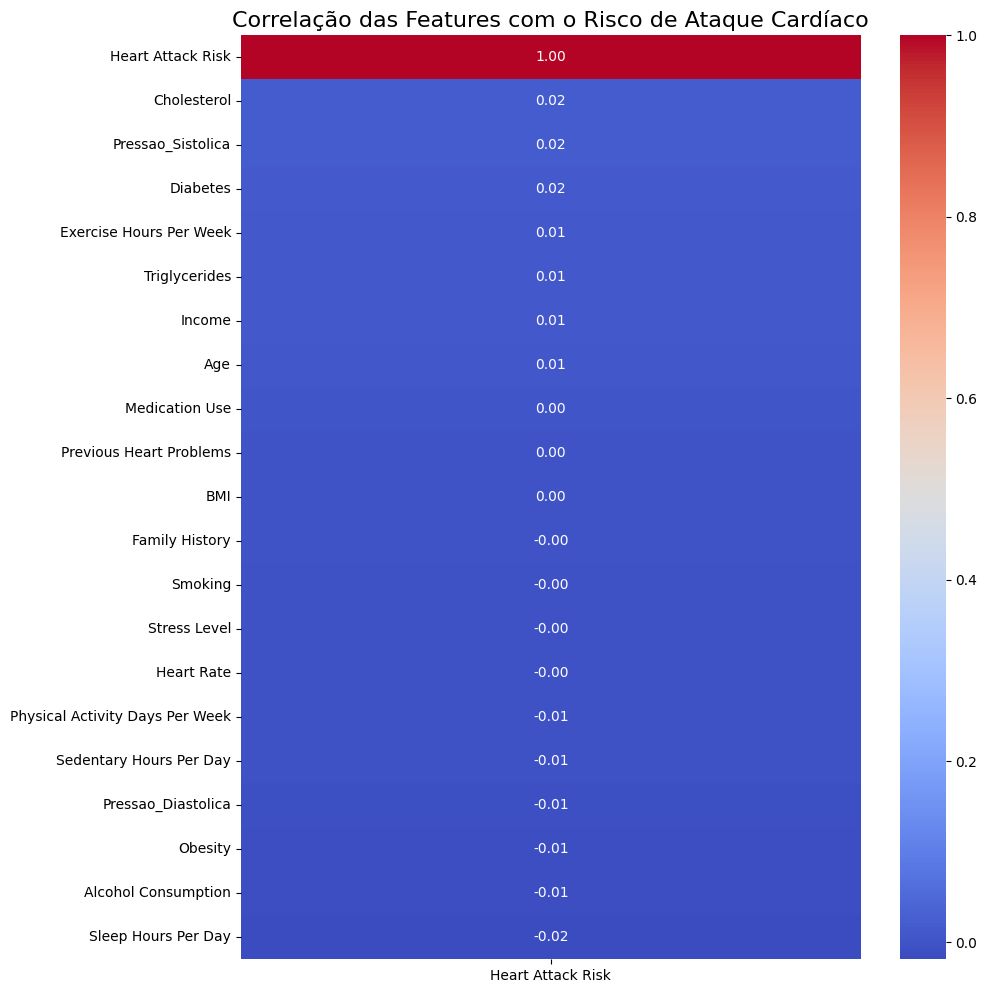

In [23]:
# Célula de Análise de Correlação
import seaborn as sns
import matplotlib.pyplot as plt

print("Calculando a matriz de correlação...")
# Usamos o DataFrame original 'df' ANTES do one-hot encoding para manter a simplicidade
# numeric_only=True ignora colunas de texto que não foram removidas
corr_matrix = df.corr(numeric_only=True)

# Focamos na correlação de todas as features com a coluna alvo
corr_target = corr_matrix[['Heart Attack Risk']].sort_values(by='Heart Attack Risk', ascending=False)

# Criando o mapa de calor
plt.figure(figsize=(10, 12))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação das Features com o Risco de Ataque Cardíaco", fontsize=16)
plt.show()

--- 20 Features Mais Importantes Segundo o Modelo ---


,importance
Income,0.070796
BMI,0.070795
Triglycerides,0.069857
Exercise Hours Per Week,0.068968
Sedentary Hours Per Day,0.068485
Cholesterol,0.067588
Heart Rate,0.062052
Age,0.062046
Pressao_Sistolica,0.062029
Pressao_Diastolica,0.060822


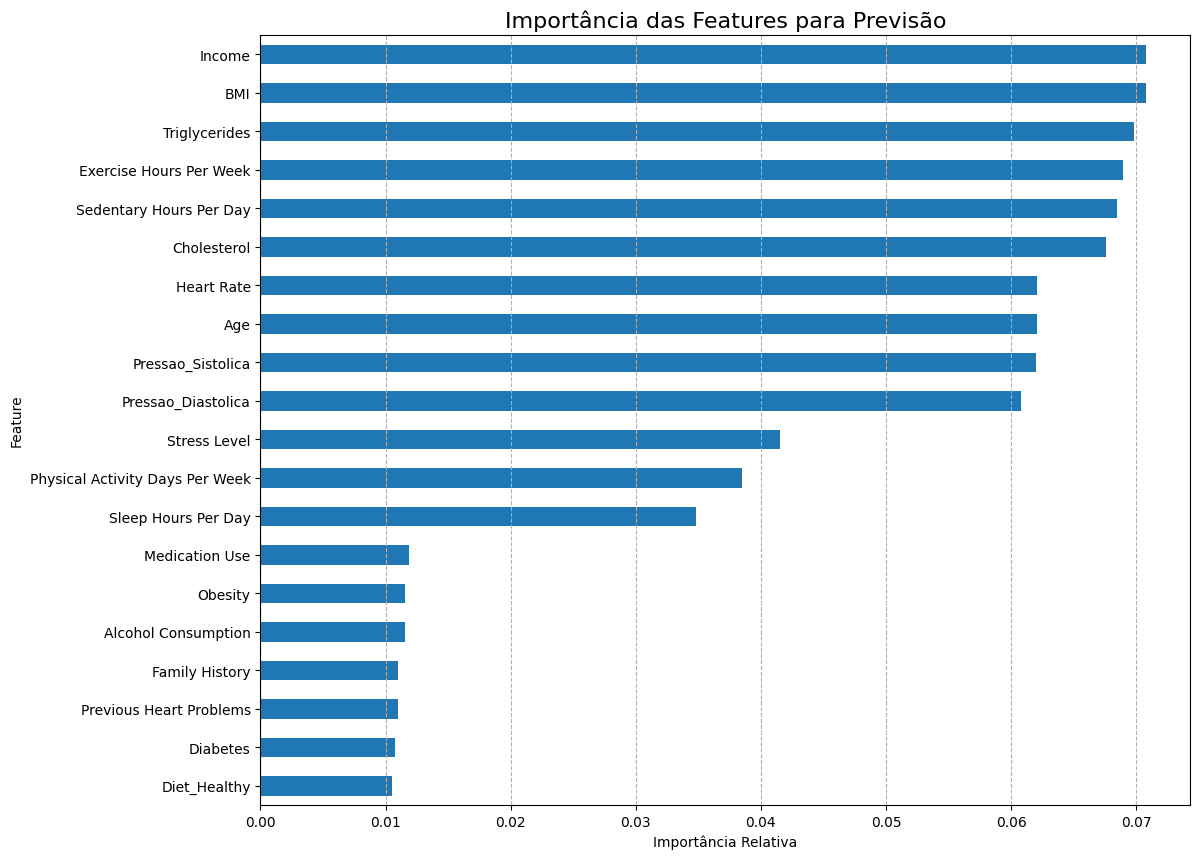

In [24]:
# Célula de Análise de Importância de Features

from sklearn.ensemble import RandomForestClassifier

# Vamos treinar um Random Forest simples nos dados de treino (escalados, mas não resampled)
# apenas para extrair a importância das features.
model_for_features = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_for_features.fit(X_train_scaled, y_train)

# Cria um DataFrame para visualizar a importância de cada feature
feature_importances = pd.DataFrame(model_for_features.feature_importances_,
                                   index = X_train.columns, # Usa as colunas do X antes de escalar para ter os nomes corretos
                                   columns=['importance']).sort_values('importance', ascending=False)

print("--- 20 Features Mais Importantes Segundo o Modelo ---")
display(feature_importances.head(20))

# Plota as 20 features mais importantes
plt.figure(figsize=(12, 10))
feature_importances.head(20).sort_values(by='importance').plot(kind='barh', ax=plt.gca(), legend=False)
plt.xlabel("Importância Relativa")
plt.ylabel("Feature")
plt.title("Importância das Features para Previsão", fontsize=16)
plt.grid(axis='x', linestyle='--')
plt.show()

In [28]:
# CÉLULA DE SALVAMENTO FINAL (AJUSTADA PARA O DecisionTreeClassifier)

import joblib
import os

# --- Bloco de Salvamento Final e Seguro ---

# O modelo que queremos salvar agora está na variável 'modelo_arvore',
# que foi treinada em uma célula anterior.
# O 'scaler' também deve ter sido definido e treinado (com .fit_transform) antes.

# 1. Define o diretório de saída e o cria se não existir.
output_dir = '../models'
os.makedirs(output_dir, exist_ok=True)

# 2. Define os caminhos completos para os arquivos (usando um nome mais claro para o modelo).
path_modelo = os.path.join(output_dir, 'modelo_arvore_final.joblib')
path_scaler = os.path.join(output_dir, 'scaler.joblib')

# 3. Salva o modelo 'modelo_arvore' e o scaler.
try:
    joblib.dump(modelo_arvore, path_modelo) # <-- MUDANÇA PRINCIPAL AQUI
    joblib.dump(scaler, path_scaler)

    print(f"✅ Modelo DecisionTree salvo com sucesso em: {path_modelo}")
    print(f"✅ Scaler salvo em: {path_scaler}")

except NameError as e:
    print(f"❌ ERRO: Uma das variáveis ('modelo_arvore' ou 'scaler') não foi definida.")
    print("Certifique-se de executar as células de treinamento e scaling antes desta.")

✅ Modelo DecisionTree salvo com sucesso em: ../models\modelo_arvore_final.joblib
✅ Scaler salvo em: ../models\scaler.joblib
